In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as numpy
print("Succesful")

/tmp/ipykernel_9196/2729468083.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Succesful


In [3]:
df = pd.read_csv("amazon-delivery-dataset.csv")
df.head(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian,object
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,object
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,object
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,object
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,object


In [6]:
# ################################################## #
# REMOVE MISSING VALUES INSIDE OF DATE COLUMNS
# ################################################## #
cleaned_df = df.dropna(subset=["Order_Date", "Time_Orderd", "Time_Order_picked"])
cleaned_df.head(5)

# DataFrame of missing values for the datetime columns:
missing_df = df.loc[~ df.index.isin(cleaned_df.index)]
print(len(missing_df))
missing_df.head(5)

444


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian,object
57,0xc002,AGRRES03DEL03,NaN,NaN,-27.160832,-78.011608,27.220832,78.071608,11-02-2022,NaN,18:25,NaN,NaN,3,Meal,electric_scooter,1.0,No,Urban,object
91,0x616f,MUMRES07DEL02,NaN,NaN,19.091458,72.827808,19.221458,72.957808,25-03-2022,NaN,20:05,NaN,NaN,3,Buffet,motorcycle,1.0,No,Metropolitian,object
101,0xc009,KOLRES03DEL02,NaN,NaN,-22.526461,-88.364453,22.656461,88.494453,18-02-2022,NaN,20:10,Sandstorms,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,object
121,0x66c,COIMBRES20DEL02,NaN,NaN,10.994136,76.963303,11.014136,76.983303,05-03-2022,NaN,11:35,Windy,High,2,Drinks,electric_scooter,0.0,No,Urban,object


In [7]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10955 entries, 1 to 11398
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10955 non-null  object 
 1   Delivery_person_ID           10955 non-null  object 
 2   Delivery_person_Age          10889 non-null  float64
 3   Delivery_person_Ratings      10873 non-null  float64
 4   Restaurant_latitude          10955 non-null  float64
 5   Restaurant_longitude         10955 non-null  float64
 6   Delivery_location_latitude   10955 non-null  float64
 7   Delivery_location_longitude  10955 non-null  float64
 8   Order_Date                   10955 non-null  object 
 9   Time_Orderd                  10955 non-null  object 
 10  Time_Order_picked            10955 non-null  object 
 11  Weather                      10955 non-null  object 
 12  Road_traffic_density         10955 non-null  object 
 13  Vehicle_condition    

## Engineer our DateTime Features

In [21]:
# Engineer our Date String into DateTime format:
dates = cleaned_df["Order_Date"]
# dates.head(10)

# Convert this to a DateTime Object:
date_dt = pd.to_datetime(
    dates, 
    format="%d-%m-%Y", errors="ignore", exact=False,
)
date_dt.head(10)

year = date_dt.dt.strftime("%Y")
year.head(10)

# Day of the week:
day_of_week = pd.Categorical(date_dt.dt.day_name())
freq_day_of_week = day_of_week.value_counts()
freq_day_of_week.sort_values(ascending=True)

/tmp/ipykernel_9196/965317294.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  date_dt = pd.to_datetime(


Sunday       1432
Saturday     1489
Tuesday      1529
Thursday     1533
Monday       1567
Wednesday    1680
Friday       1725
Name: count, dtype: int64

### Pie Chart for Day of Week Frequencies

([<matplotlib.patches.Wedge at 0x7fd43d1cd190>,
 [Text(0.9681314150100372, 0.5222275014499556, 'Tuesday'),
  Text(0.14484278197580777, 1.0904221973664645, 'Thursday'),
  Text(-0.7452173329254245, 0.8091051394642832, 'Saturday'),
  Text(-1.0999312045812177, -0.012302243230881589, 'Sunday'),
  Text(-0.71645958263571, -0.834676983299207, 'Friday'),
  Text(0.18476212554912208, -1.0843721487398, 'Wednesday'),
  Text(0.9747897907197508, -0.5096909494081141, 'Monday')])

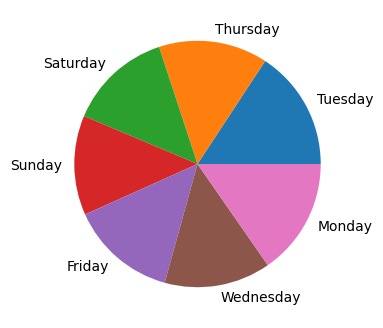

In [23]:
# Pie Chart for Categorical Day of Week Deliveries
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
ax.pie(freq_day_of_week, labels=day_of_week.unique(),)

In [30]:
%%time
# #################################################
# Merging Dates with Timestamps
# #################################################
cleaned_df["Time_Orderd"].head(20)

# Add leading 0 to single-digit hours:
order_time = cleaned_df["Time_Orderd"].apply(lambda x: "0" + x if len(x) == 4 else x)
order_time.head(20)

# Combine date string with our timestamp:
dates = cleaned_df["Order_Date"]
order_datetime = dates + "T" + order_time
order_datetime.head(20)

# Creating a DateTime object from a date string & timestamp string:
order_datetime_dt = pd.to_datetime(
    order_datetime, 
    format="%d-%m-%YT%H:%M",
    exact=False,
)
order_datetime_dt.head(20)
print(order_datetime_dt.min())
print(order_datetime_dt.max())


2022-02-11 08:06:00
2022-04-06 23:55:00
CPU times: user 24.1 ms, sys: 0 ns, total: 24.1 ms
Wall time: 24 ms


In [40]:
pickup_time = cleaned_df["Time_Order_picked"]
pickup_time = pickup_time.apply(lambda x: "0" + x if len(x) == 4 else x)
pickup_time_dt = pd.to_datetime(pickup_time, format="%H:%M", exact=False)

dates = cleaned_df["Order_Date"]
pickup_datetime = dates + "T" + pickup_time_dt.dt.strftime("%H:%M")

pickup_datetime_dt = pd.to_datetime(
    pickup_datetime,
    format="%d-%m-%YT%H:%M",
    exact=False
)
pickup_datetime_dt.head(10)

# Boolean filter to check if pickup date is less than order date:
mask = order_datetime_dt > pickup_datetime_dt
order_datetime_dt[mask] += pd.Timedelta(days=1)
order_datetime_dt

cleaned_df["order_datetime"] = order_datetime_dt
cleaned_df["pickup_datetime"] = pickup_datetime_dt
cleaned_df.head(5)

/tmp/ipykernel_9196/1069435974.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["order_datetime"] = order_datetime_dt
/tmp/ipykernel_9196/1069435974.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["pickup_datetime"] = pickup_datetime_dt


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:,order_datetime,pickup_datetime
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,...,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,object,2022-03-29 20:30:00,2022-03-29 20:35:00
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,...,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,object,2022-03-10 19:35:00,2022-03-10 19:45:00
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,...,Medium,1,Meal,scooter,1.0,No,Metropolitian,object,2022-04-02 17:15:00,2022-04-02 17:20:00
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,...,Medium,2,Drinks,scooter,1.0,No,Metropolitian,object,2022-03-27 18:25:00,2022-03-27 18:40:00
5,0xc4af,GOARES04DEL01,26.0,4.7,15.569600,73.742294,15.579600,73.752294,15-02-2022,9:45,...,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,object,2022-02-15 09:45:00,2022-02-15 09:55:00


In [42]:
diff = (cleaned_df["pickup_datetime"] - cleaned_df["order_datetime"]).dt.total_seconds() / 60 
diff.head(20)

1      5.0
2     10.0
3      5.0
4     15.0
5     10.0
6     59.0
7     59.0
8     15.0
9     10.0
10     5.0
11    10.0
12    10.0
13    15.0
14    10.0
15    15.0
16     5.0
17    15.0
18    15.0
19     5.0
20    10.0
dtype: float64